In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
alpha = 0.05

# 0.1 Предварительный анализ данных

In [3]:
shootings_2018 = pd.read_csv('data/shootings_2018.csv')
shootings_2019 = pd.read_csv('data/shootings_2019.csv')
shootings_2020 = pd.read_csv('data/shootings_2020.csv')
shootings_2021 = pd.read_csv('data/shootings_2021.csv')
shootings_2022 = pd.read_csv('data/shootings_2022.csv')
shootings_all = pd.concat([shootings_2018, shootings_2019, shootings_2020, shootings_2021, shootings_2022])
shootings_all['Date'] = pd.to_datetime(shootings_all['Date'], format="%d/%m/%Y")

In [4]:
shootings_all.describe(include='all', datetime_is_numeric=True)

Date     State         Dead      Injured  \
count                            2153      2153  2153.000000  2153.000000   
unique                            NaN        53          NaN          NaN   
top                               NaN  Illinois          NaN          NaN   
freq                              NaN       236          NaN          NaN   
mean    2020-05-26 07:32:48.044588800       NaN     1.031119     4.056665   
min               2018-01-01 00:00:00       NaN     0.000000     0.000000   
25%               2019-07-07 00:00:00       NaN     0.000000     3.000000   
50%               2020-07-19 00:00:00       NaN     1.000000     4.000000   
75%               2021-05-26 00:00:00       NaN     1.000000     5.000000   
max               2022-03-03 00:00:00       NaN    23.000000    27.000000   
std                               NaN       NaN     1.532018     2.223051   

              Total                              Description  
count   2153.000000                                     2153  
unique          NaN                                     2123  
top             NaN  Four people were injured in a shooting.  
freq            NaN                                       12  
mean       5.086391                                      NaN  
min        2.000000                                      NaN  
25%        4.000000                                      NaN  
50%        4.000000                                      NaN  
75%        5.000000                                      NaN  
max       46.000000                                      NaN  
std        2.433305                                      NaN

In [5]:
shootings_all = shootings_all[~((shootings_all['Dead'] + shootings_all['Injured'] ) != shootings_all['Total'])]


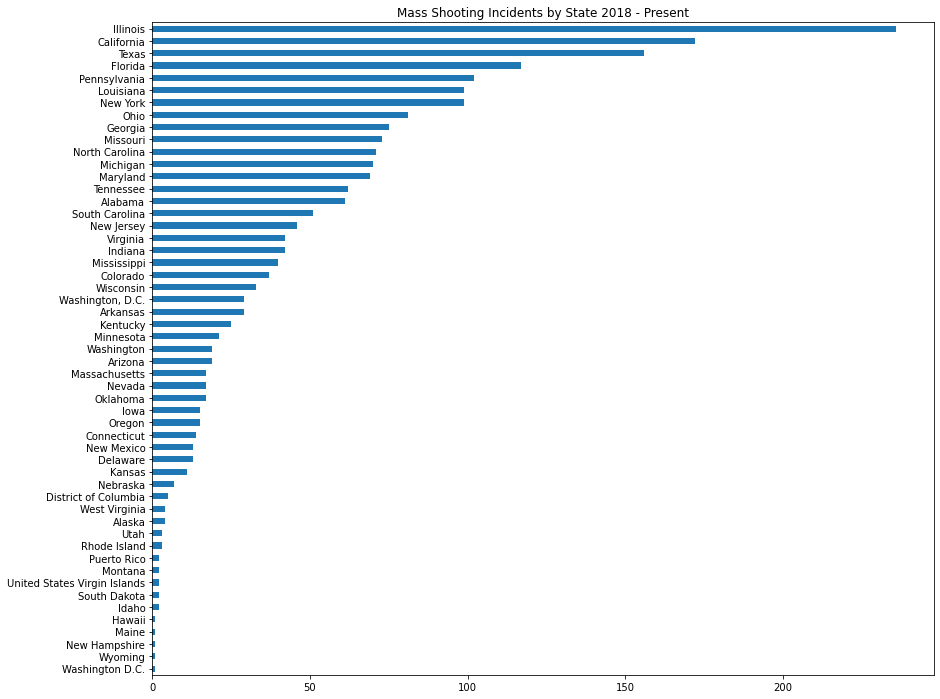

In [6]:
title_text = "Mass Shooting Incidents by State 2018 - Present"
shootings_all['State'].value_counts().sort_values().plot.barh(figsize=(14, 12), title=title_text);

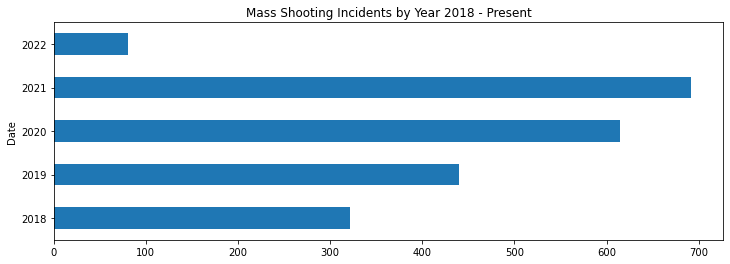

In [7]:
title_text = "Mass Shooting Incidents by Year 2018 - Present"
agg_by_year = shootings_all['Date'].groupby([shootings_all.Date.dt.year]).agg('count')
agg_by_year.plot.barh(figsize=(12, 4), title=title_text);

In [8]:
agg_by_month = shootings_all.groupby([shootings_all.Date.dt.year.rename('Year'),
                                      shootings_all.Date.dt.month.rename('Month')]).agg(incidents=('Date', 'count'),
                                                                                        dead=('Dead', 'sum'),
                                                                                        injured=('Injured', 'sum'),
                                                                                        total=('Total', 'sum'))
yy_mm = [(f'{i}-{j}') for i, j in agg_by_month.index]
agg_by_month.index = yy_mm

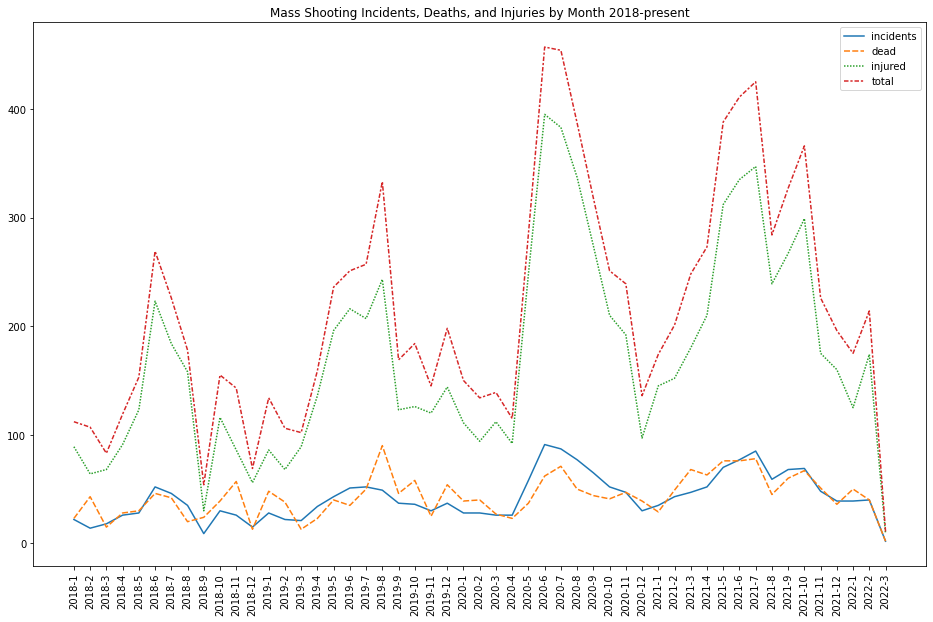

In [9]:
plt.figure(figsize=(16,10))

# Add title
plt.title("Mass Shooting Incidents, Deaths, and Injuries by Month 2018-present")

# Rotate the x-axis labels for readability
plt.xticks(rotation=90)

sns.lineplot(data=agg_by_month);
plt.savefig(fname='img/all', dpi=300)

In [10]:
time = shootings_all['Date'].iloc[0]
shootings_all['Month'] = shootings_all['Date'].apply(lambda time: time.month)
shootings_all['Day'] = shootings_all['Date'].apply(lambda time: time.day)
shootings_all['Year'] = shootings_all['Date'].apply(lambda time: time.year)
shootings_all['Day of Week'] = shootings_all['Date'].apply(lambda time: time.dayofweek)
shootings_all.head()

Date      State  Dead  Injured  Total  \
0 2018-12-31       Ohio     3        2      5   
1 2018-12-29       Ohio     1        3      4   
2 2018-12-28   Missouri     4        1      5   
3 2018-12-24  Louisiana     2        2      4   
4 2018-12-23   Missouri     0        7      7   

                                         Description  Month  Day  Year  \
0  A dispute began at a rented Airbnb during a Ne...     12   31  2018   
1  One person was killed and three people were wo...     12   29  2018   
2  A gunman shot and killed his girlfriend, her t...     12   28  2018   
3  Three people were killed and two others were w...     12   24  2018   
4  Seven people were wounded during a shooting at...     12   23  2018   

   Day of Week  
0            0  
1            5  
2            4  
3            0  
4            6

In [11]:
dmap={0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
shootings_all['Day of Week']= shootings_all['Day of Week'].map(dmap)

In [12]:
shootings_all.head()

Date      State  Dead  Injured  Total  \
0 2018-12-31       Ohio     3        2      5   
1 2018-12-29       Ohio     1        3      4   
2 2018-12-28   Missouri     4        1      5   
3 2018-12-24  Louisiana     2        2      4   
4 2018-12-23   Missouri     0        7      7   

                                         Description  Month  Day  Year  \
0  A dispute began at a rented Airbnb during a Ne...     12   31  2018   
1  One person was killed and three people were wo...     12   29  2018   
2  A gunman shot and killed his girlfriend, her t...     12   28  2018   
3  Three people were killed and two others were w...     12   24  2018   
4  Seven people were wounded during a shooting at...     12   23  2018   

  Day of Week  
0         Mon  
1         Sat  
2         Fri  
3         Mon  
4         Sun

In [13]:
shootings_all['State'].value_counts().head(10).to_frame(name = 'Count').reset_index().style.background_gradient(cmap='Blues', subset = 'Count')

In [14]:
shootings_all['Month'].value_counts().head(12).to_frame('Count').reset_index().style.background_gradient(cmap='Blues', subset='Count')

In [15]:
shootings_all['Day'].value_counts().head(32).to_frame(name = 'Count').reset_index().style.background_gradient(cmap='Blues', subset ='Count')

In [16]:
shootings_all['Day of Week'].value_counts().head(7).to_frame(name = 'Count').reset_index().style.background_gradient(cmap='Blues', subset ='Count')

In [17]:
shootings_all['Year'].value_counts().head(10).to_frame(name = 'Count').reset_index().style.background_gradient(cmap = 'Blues', subset = 'Count')

In [18]:
dayMonth = shootings_all.groupby(by=['Day of Week', 'Month']).count()['Date'].unstack()
dayMonth.head()

Month        1   2   3   4   5   6   7   8   9   10  11  12
Day of Week                                                
Fri          21  18  12  14  21  25  28  20  14  21  17  25
Mon          11  14  10  15  21  30  34  27  23  19  20  10
Sat          33  39  27  27  55  64  50  53  44  45  29  20
Sun          43  31  32  43  53  73  76  63  50  46  43  34
Thu          16  16  11  13  14  27  36  13  17  26  15  16

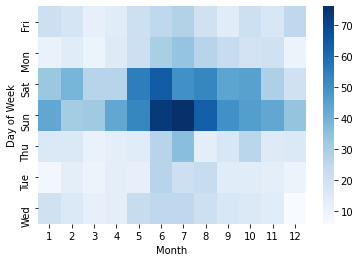

In [19]:
sns.heatmap(dayMonth, cmap = 'Blues')
plt.savefig(fname='img/heatmap', dpi=300)

# 0.2 Графики плотности и эмпирической функции распределения

<AxesSubplot:>

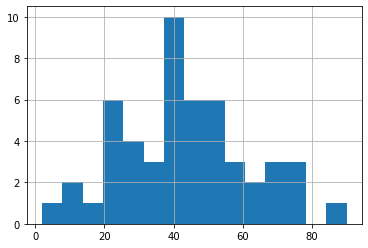

In [20]:
bins = 15
agg_by_month['dead'].hist(bins=bins)

In [21]:
count, bins_count = np.histogram(agg_by_month['dead'], bins = bins)
pdf = count / sum(count)
cdf = np.cumsum(pdf)

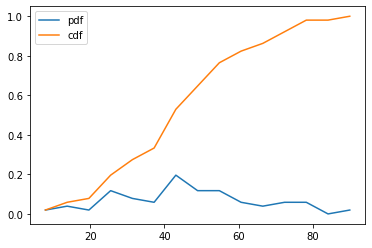

In [22]:
sns.lineplot(x=bins_count[1:], y=pdf, label='pdf')
sns.lineplot(x=bins_count[1:], y=cdf, label='cdf')
plt.savefig(fname='img/dead_cdf_pdf', dpi=300)

<AxesSubplot:>

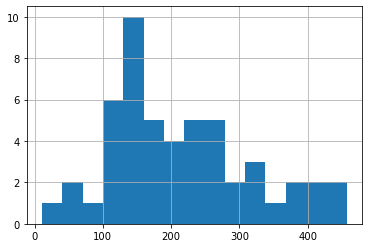

In [23]:
agg_by_month['total'].hist(bins=bins)

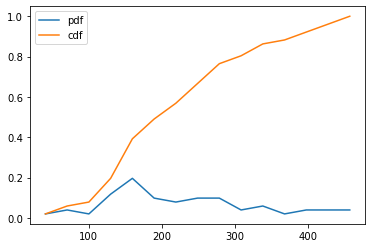

In [24]:
count, bins_count = np.histogram(agg_by_month['total'], bins = bins)
pdf = count / sum(count)
cdf = np.cumsum(pdf)

sns.lineplot(x=bins_count[1:], y=pdf, label='pdf')
sns.lineplot(x=bins_count[1:], y=cdf, label='cdf')
plt.savefig(fname='img/total_cdf_pdf', dpi=300)

<AxesSubplot:>

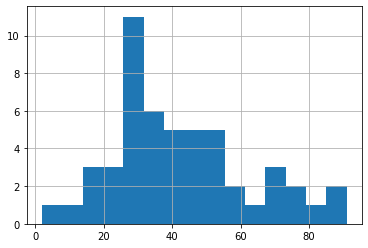

In [25]:
agg_by_month['incidents'].hist(bins=bins)

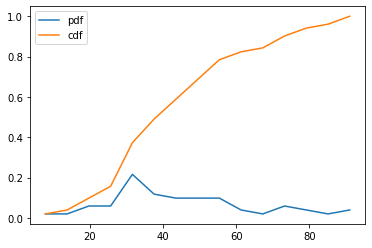

In [26]:
count, bins_count = np.histogram(agg_by_month['incidents'], bins = bins)
pdf = count / sum(count)
cdf = np.cumsum(pdf)

sns.lineplot(x=bins_count[1:], y=pdf, label='pdf')
sns.lineplot(x=bins_count[1:], y=cdf, label='cdf')
plt.savefig(fname='img/incidents_cdf_pdf', dpi=300)

<AxesSubplot:>

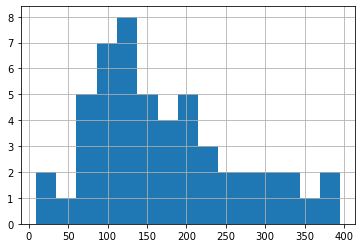

In [27]:
agg_by_month['injured'].hist(bins=bins)

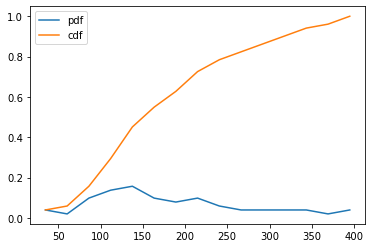

In [28]:
count, bins_count = np.histogram(agg_by_month['injured'], bins = bins)
pdf = count / sum(count)
cdf = np.cumsum(pdf)

sns.lineplot(x=bins_count[1:], y=pdf, label='pdf')
sns.lineplot(x=bins_count[1:], y=cdf, label='cdf')
plt.savefig(fname='img/injured_cdf_pdf', dpi=300)

# 1 Случайность

In [29]:
dead = agg_by_month['dead'].values
dead

array([23, 43, 15, 28, 30, 46, 42, 20, 24, 39, 57, 13, 48, 38, 13, 23, 40,
       35, 50, 90, 46, 58, 25, 54, 39, 40, 27, 23, 37, 62, 71, 50, 44, 41,
       47, 39, 29, 49, 68, 63, 76, 76, 78, 45, 60, 67, 51, 36, 50, 40,  2])

In [30]:
n = dead.shape[0]
n

51

In [31]:
# Критерий автокорреляции
r = (n*np.sum(dead[:n-1]*dead[1:]) - np.sum(dead)**2 + n*dead[0]*dead[-1]) / (n*np.sum(dead**2) - np.sum(dead)**2)
r

0.42697800077190273

In [32]:
mean_r = -1/(n-1)
var_r = n*(n-3)/((n+1)*(n-1)**2)
mean_r, var_r

(-0.02, 0.01883076923076923)

In [33]:
r_normed = (r - mean_r)/np.sqrt(var_r)
r_normed

3.2572576902029855

In [34]:
# Percent point function
q = stats.norm.ppf(1 - alpha)
q

1.6448536269514722

In [35]:
if(r_normed < q):
    print('Accepted')
else:
    print('Denied')

Denied


In [36]:
#Критерий Морана
M = (n - 1)**(1/2) *(n*r + 1)/(n - 2)
if(M < q):
    print('Accepted')
else:
    print('Denied')

Denied


# 2 Независимость dead и injured

In [37]:
injured = agg_by_month['injured'].values
injured

array([ 89,  64,  68,  91, 123, 223, 184, 158,  30, 116,  86,  56,  86,
        68,  89, 136, 196, 216, 207, 243, 123, 126, 120, 144, 111,  94,
       112,  92, 248, 395, 383, 337, 274, 210, 192,  97, 145, 152, 180,
       210, 312, 335, 347, 239, 267, 299, 175, 160, 125, 174,   9])

In [38]:
H, xeges, yeges = np.histogram2d(dead, injured, bins=5)
H, xeges, yeges

(array([[ 3.,  1.,  0.,  0.,  0.],
        [ 1., 10.,  1.,  1.,  0.],
        [ 3.,  8.,  9.,  1.,  1.],
        [ 1.,  1.,  2.,  2.,  2.],
        [ 0.,  0.,  0.,  2.,  2.]]),
 array([ 2. , 19.6, 37.2, 54.8, 72.4, 90. ]),
 array([  9. ,  86.2, 163.4, 240.6, 317.8, 395. ]))

In [39]:
pi = np.sum(H, axis=1) / n
pi

array([0.07843137, 0.25490196, 0.43137255, 0.15686275, 0.07843137])

In [40]:
pj = np.sum(H, axis=0) / n
pj

array([0.15686275, 0.39215686, 0.23529412, 0.11764706, 0.09803922])

In [41]:
chi_2 = 0
for i in range(pi.shape[0]):
    for j in range(pj.shape[0]):
        chi_2 += ((H[i][j] - n*pi[i]*pj[j])**2) / n*pi[i]*pj[j]
        
chi_2

0.09923265877140104

In [42]:
chi_2_krit = 5.142

In [43]:
if(chi_2 < chi_2_krit):
    print('Accepted')
else:
    print('Denied')

Accepted


# 3, 4 Корреляция

In [44]:
shootings_all.corr()

Dead   Injured     Total     Month       Day      Year
Dead     1.000000 -0.198553  0.447927 -0.021404  0.019153 -0.044213
Injured -0.198553  1.000000  0.787332  0.010174  0.023653  0.005916
Total    0.447927  0.787332  1.000000 -0.004183  0.033625 -0.022415
Month   -0.021404  0.010174 -0.004183  1.000000  0.007925 -0.109726
Day      0.019153  0.023653  0.033625  0.007925  1.000000 -0.000680
Year    -0.044213  0.005916 -0.022415 -0.109726 -0.000680  1.000000

In [45]:
stats.pearsonr(shootings_all['Dead'], shootings_all['Month'])

(-0.02140421531114923, 0.32130578017427863)

# 5 однородность, равномерное распределение, нормальное распределение

In [46]:
data = agg_by_month['dead'].values
n = len(data)
count, bins_edges = np.histogram(data, bins = bins)
count, bins_edges

(array([ 1,  2,  1,  6,  4,  3, 10,  6,  6,  3,  2,  3,  3,  0,  1]),
 array([ 2.        ,  7.86666667, 13.73333333, 19.6       , 25.46666667,
        31.33333333, 37.2       , 43.06666667, 48.93333333, 54.8       ,
        60.66666667, 66.53333333, 72.4       , 78.26666667, 84.13333333,
        90.        ]))

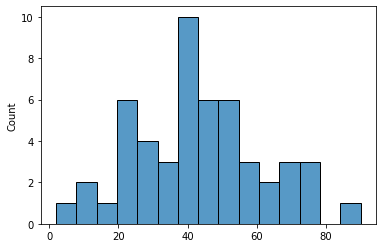

In [47]:
sns.histplot(data, bins=bins)
plt.savefig(fname='img/dead_hist', dpi=300)

In [48]:
chi_2, pvalue = stats.chisquare(f_obs=count, f_exp=np.zeros(count.shape[0]) + np.mean(count))
chi_2, pvalue

(28.705882352941178, 0.01145013878848056)

In [49]:
if(pvalue < alpha):
    print('Denied')
else:
    print('Accept')

Denied


In [50]:
ks, pvalue = stats.kstest(data, 'norm')
ks, pvalue

(0.9803921568627451, 1.6404047367695243e-87)

In [51]:
if(pvalue < alpha):
    print('Denied')
else:
    print('Accept')

Denied


# 6 Trend

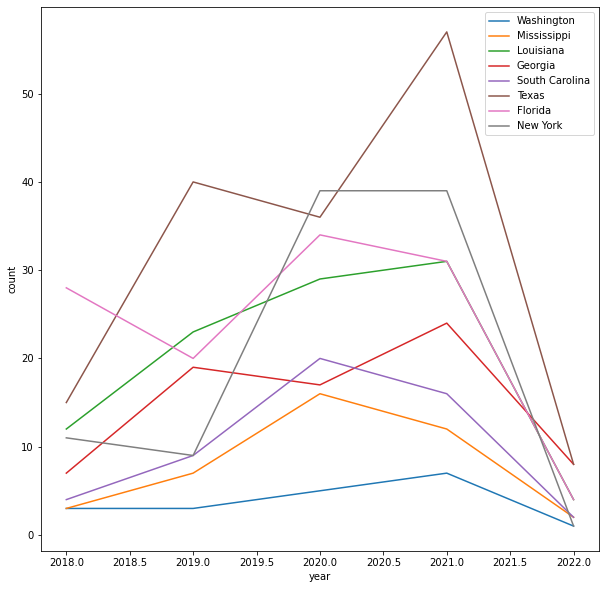

In [52]:
index = ['Washington', 'Mississippi', 'Louisiana', 'Georgia', 'South Carolina', 
        'Texas', 'Florida', 'New York']

plt.figure(figsize=(10, 10))
for i in index:
    cur = shootings_all[shootings_all['State'] == i]
    sns.lineplot(x=cur['Year'].value_counts().index, y=cur['Year'].value_counts())
    
plt.xlabel('year')
plt.ylabel('count')
plt.legend(index)
plt.savefig(fname='img/trend', dpi=300)